<a href="https://colab.research.google.com/github/mathfish/LearningTopics/blob/main/Books/PytorchMastery/PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

## 1. Prepare Data

* Will generate data using $Y = mx + b$
* Will add extra dimension to make it 2D
* Split data into training, validation, and test sets - we will only do train and test

In [2]:
# Generate Data

## parameters
weight = .7
bias = .3

## Create
start = 0
end = 1
step = .02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
# Training and test set
train_split  = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                     ):
  """
  Plots training and test data and compares predictions
  """

  # Plot training data
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  # show legend
  plt.legend(prop={"size": 14});

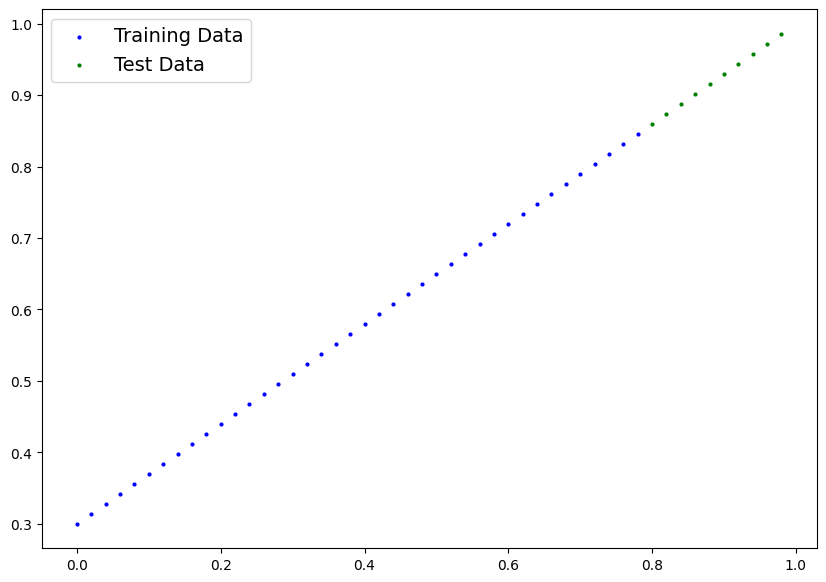

In [5]:
plot_predictions();

## 2. Build Model
* Build class that extends `nn.Module`
  * Almost everything uses this Module
  * Need to subclass this for your model
  * Need to override `forward`
* Process
  * Starts with random values
  * Looks at training data and adjusts the random values to better represent true parameter values
  * By Gradient Descent and Back Propagation
* Key things in PyTorch
  * `torch.nn` - contains all the building for computational graphs
  * `torch.nn.Parameter` - What parameters should our model try and learn. Often a PyTorch layer from `torch.nn` will set these for us
  * `torch.nn.Module` - The base Class for all neural network modules
  * `torch.optim` - Where the optimizers for PyTorch are
  * `torch.utils.data` - good things for data Dataset and DataLoader
* Model Contents
  * `model.parameters()`
* Predictions with `torch.inference_mode()`
  * No grad function used
  * Speeds up prediction
  * May see older approach: `torch.no_grad()`

In [6]:
# Build linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # true by default
                                            dtype=torch.float))
    self.bias =  nn.Parameter(torch.randn(1,
                                            requires_grad=True, # true by default
                                            dtype=torch.float))

  # Must define / override forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [7]:
# Create random seed
torch.manual_seed(42)

# Create model instance
model_0 = LinearRegressionModel()

# Check out parameters
print(list(model_0.parameters()))

print()
# named parameters
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


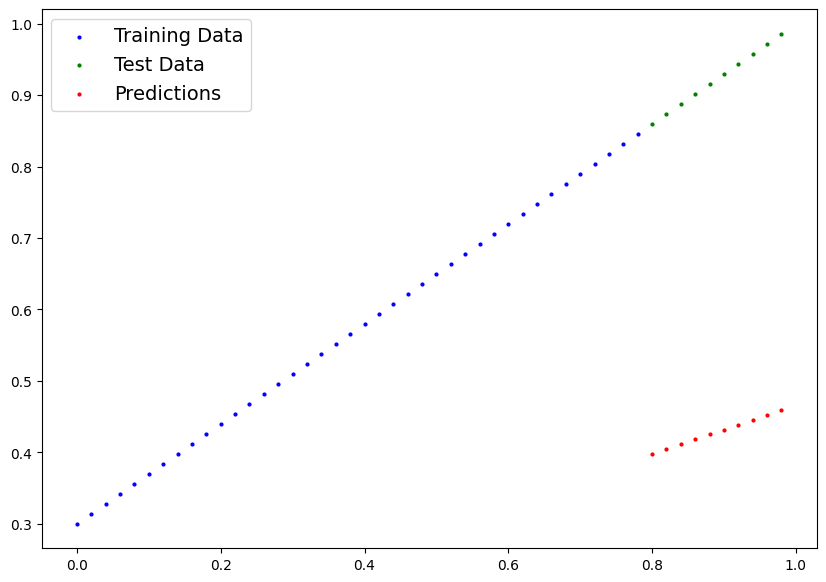

In [8]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds);

## 3. Train Model

* Need
  * Loss function
  * Optimizer to update parmeters given loss
  * Training and testing loops

In [9]:
# Setup MAE loss
loss_fn = nn.L1Loss()

# Setup Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [10]:
# Training Loop
torch.manual_seed(42)
epochs = 200
epoch_count =[]
loss_values = []
test_loss_values = []

# 0. loop through data by num epochs
for epoch in range(epochs):
  # set model to training mode to set parameters that have require_grad to have graident
  model_0.train()

  # 1. forward pass
  y_pred = model_0(X_train)
  # 2. calculate loss
  loss = loss_fn(y_pred, y_train)
  # 3. optimizer zero grad - zero for next iteration since gradients accumulate
  optimizer.zero_grad()
  # 4. perform backprop
  loss.backward()
  # 5. gradient descent
  optimizer.step()

  # turns off gradient tracking and other setting not needed for testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch {epoch}: Loss {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())


Epoch 0: Loss 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch 10: Loss 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch 20: Loss 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch 30: Loss 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch 40: Loss 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch 50: Loss 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch 60: Loss 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch 70: Loss 

In [11]:
with torch.inference_mode():
  y_preds_v1 = model_0(X_test)

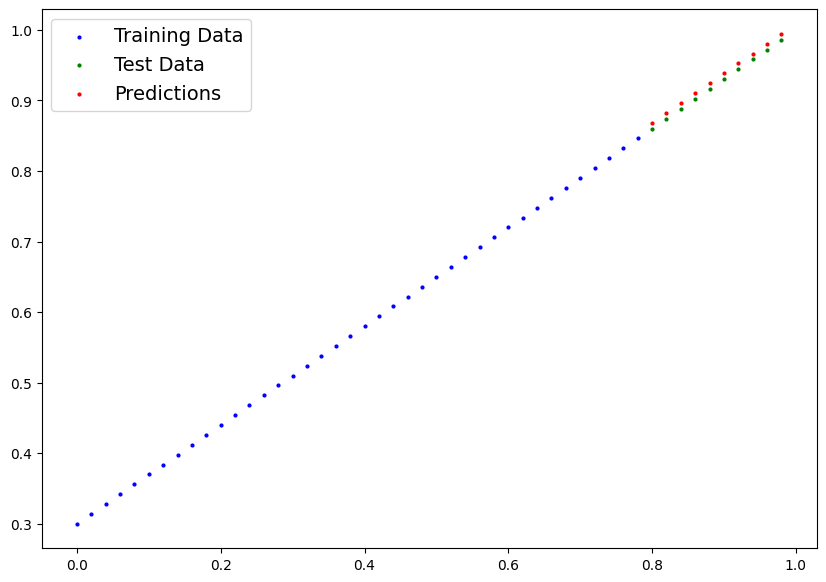

In [12]:
plot_predictions(predictions=y_preds_v1)

In [13]:
test_loss_values[0].item()

0.48106518387794495

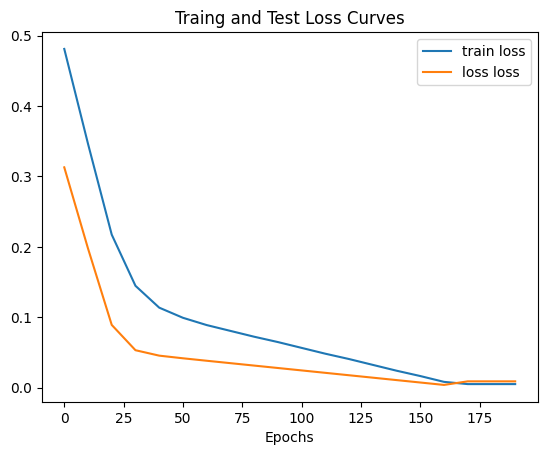

In [14]:
# plot loss curves

test_loss_ = [i.item() for i in test_loss_values]
train_loss_ = [i.item() for i in loss_values]

plt.plot(epoch_count, test_loss_, label="train loss")
plt.plot(epoch_count, train_loss_, label="loss loss")
plt.title("Traing and Test Loss Curves")
plt.xlabel("Epochs")
plt.legend();

## 4. Save Model

* 3 Main methods for saving and loading
  * `torch.save()` - pickle format to save model (best practice is to save state_dict)
  * `torch.load()`
  * `torch.nn.Module.load_state_dict()` - load a model's saved state dictionary (the model's learnable parameters)
    * This is the preferred way to save and load a state_dict


In [15]:
# Save our PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save Model
print(f"Save to model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Save to model to models/pytorch_workflow_model_0.pt


In [16]:
# Create instance of model class and load in state dictionary
model_0_loaded = LinearRegressionModel()

# Load the saved state_dict of model_0
model_0_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

## 5. Putting It All Together

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1,
                                  bias=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

In [33]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
loss_fn_v2 = nn.L1Loss()
optimizer_v2 = torch.optim.SGD(lr=.01, params=model_1.parameters())

torch.manual_seed(42)
epochs = 200

# Put data on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  # set to train
  model_1.train()
  # forward pass
  y_pred_ = model_1(X_train)
  # compute loss
  loss_ = loss_fn_v2(y_pred_, y_train)
  # zero out gradients
  optimizer_v2.zero_grad()
  # backprop
  loss_.backward()
  # gradient descent
  optimizer_v2.step()

  # set to test
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss_ = loss_fn_v2(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Traing Loss {loss_:.4f} | Test Loss {test_loss_:.4f}")

Epoch 0 | Traing Loss 0.5552 | Test Loss 0.5740
Epoch 10 | Traing Loss 0.4400 | Test Loss 0.4393
Epoch 20 | Traing Loss 0.3248 | Test Loss 0.3046
Epoch 30 | Traing Loss 0.2095 | Test Loss 0.1698
Epoch 40 | Traing Loss 0.0943 | Test Loss 0.0351
Epoch 50 | Traing Loss 0.0239 | Test Loss 0.0478
Epoch 60 | Traing Loss 0.0200 | Test Loss 0.0458
Epoch 70 | Traing Loss 0.0165 | Test Loss 0.0375
Epoch 80 | Traing Loss 0.0131 | Test Loss 0.0299
Epoch 90 | Traing Loss 0.0097 | Test Loss 0.0217
Epoch 100 | Traing Loss 0.0062 | Test Loss 0.0141
Epoch 110 | Traing Loss 0.0028 | Test Loss 0.0058
Epoch 120 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 130 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 140 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 150 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 160 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 170 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 180 | Traing Loss 0.0013 | Test Loss 0.0138
Epoch 190 | Traing Loss 0.0013 | Test Loss 0.0138


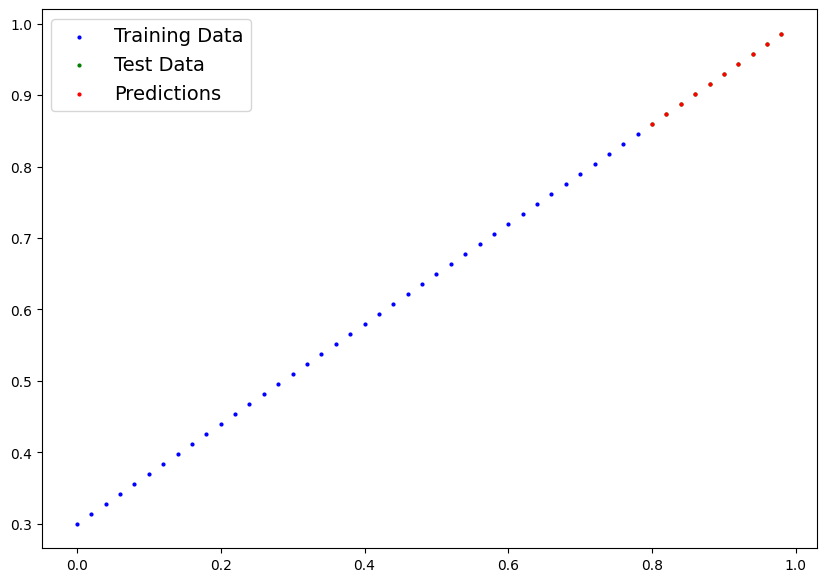

In [36]:
model_1.eval()
with torch.inference_mode():
  test_preds_v2 = model_1(X_test)

plot_predictions(predictions=test_preds_v2.to("cpu"))

* Save model's state dictionary using Pathlib and torch.save
* To load instantiate new module and use the load_state_dict method
* Use torch.load to get saved model state_dict to pass in